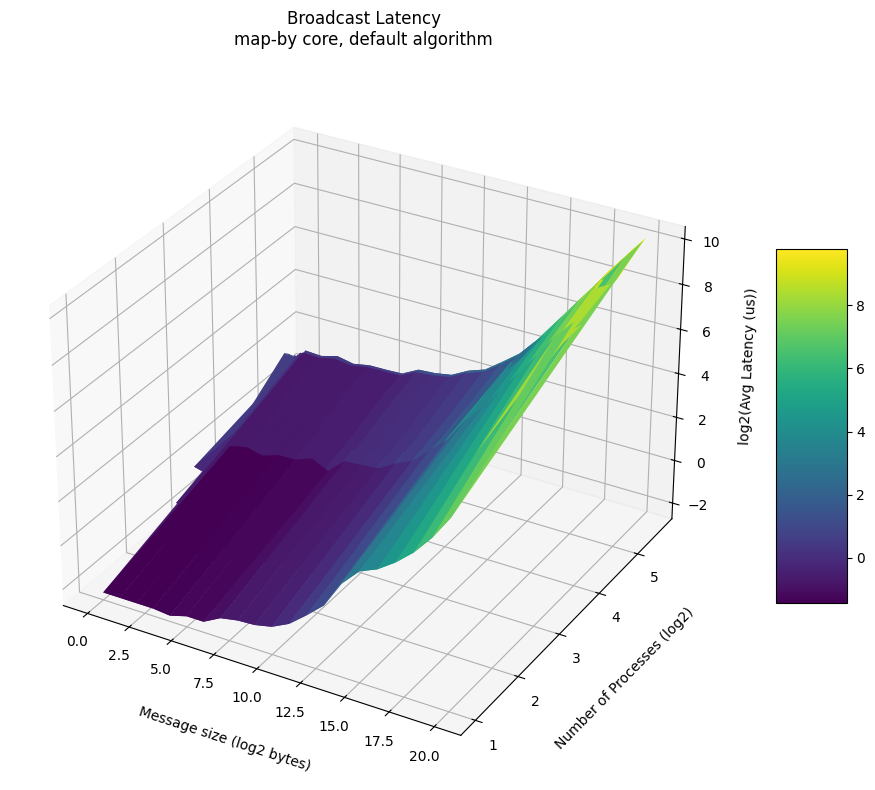

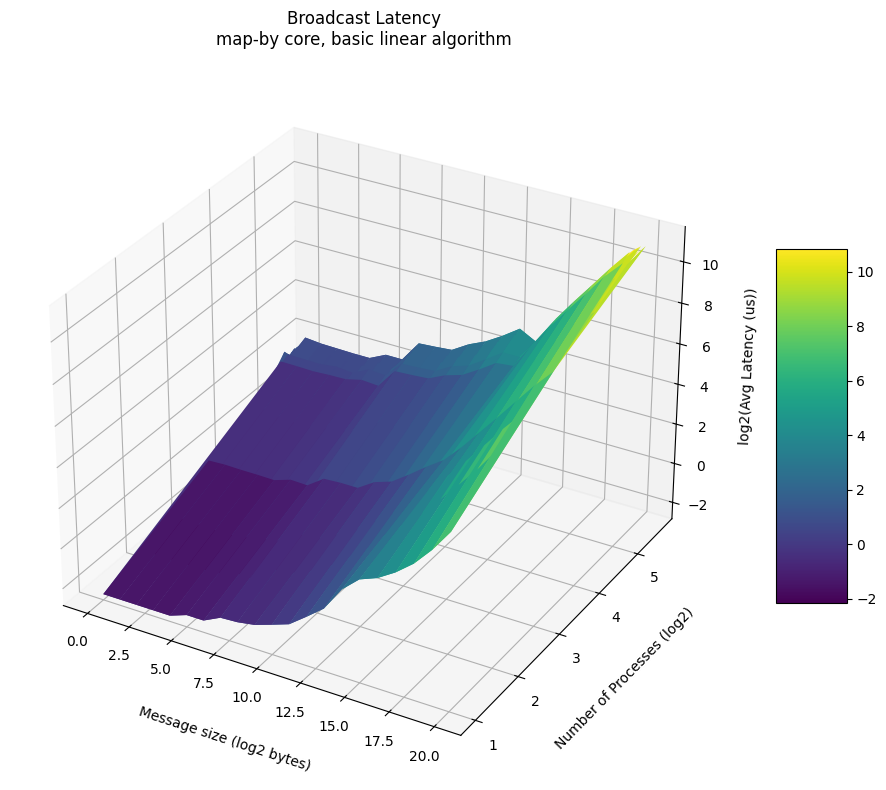

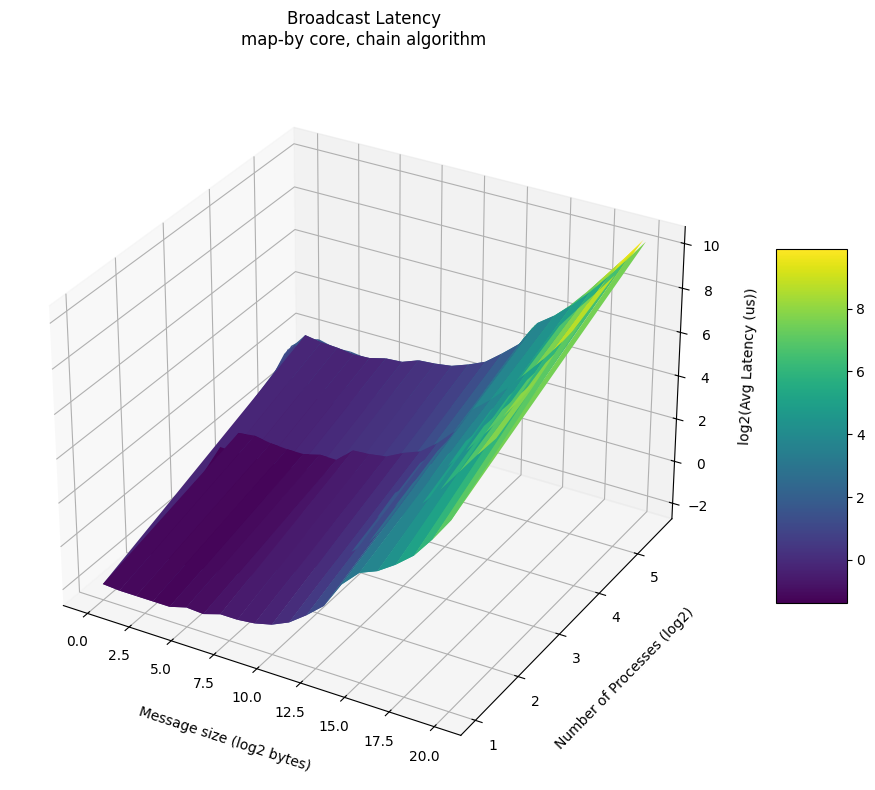

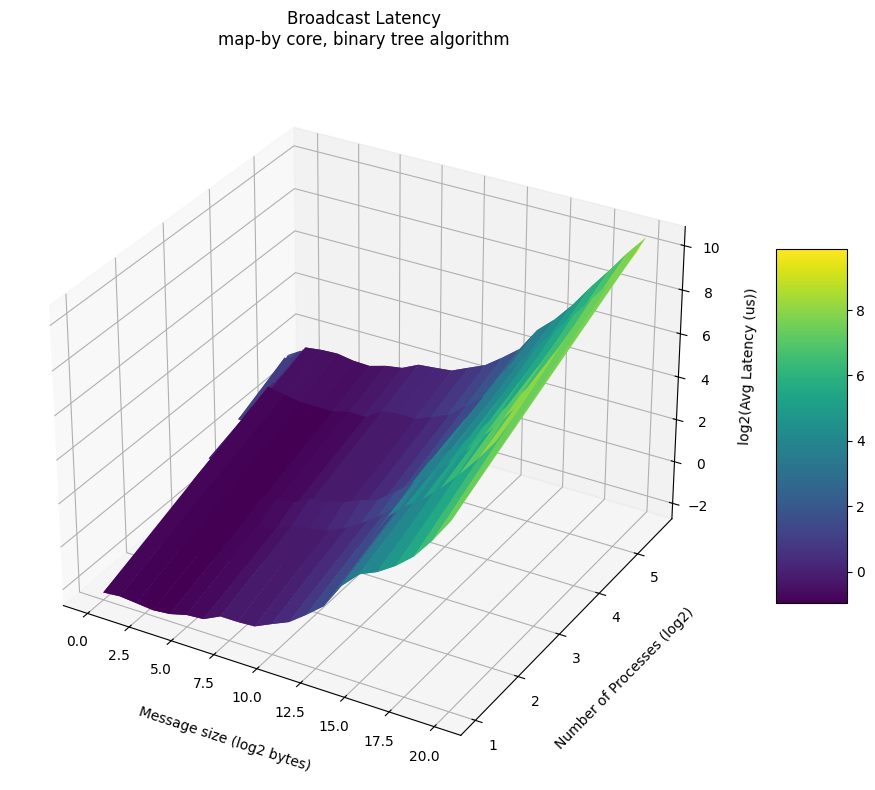

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
from IPython.display import display, HTML

# Load the consolidated data
consolidated_df = pd.read_csv("bcast_results.csv")

# Ensure the columns are correctly formatted
consolidated_df.columns = [col.strip() for col in consolidated_df.columns]

# Dictionary to map algorithm labels for plotting
alg_labels = {
    'default': 'default algorithm',
    'basic linear': 'basic linear algorithm',
    'chain': 'chain algorithm',
    'binary tree': 'binary tree algorithm'
}

# Function to create 3D heatmaps
def plot_3d_heatmap(data, algorithm, title, filename):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    subset = data[data['Algorithm'] == algorithm]
    X_unique = subset['Size'].unique()
    Y_unique = subset['Processes'].unique()
    X, Y = np.meshgrid(X_unique, Y_unique)
    Z = np.zeros_like(X, dtype=float)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            value = subset[(subset['Size'] == X[i, j]) & (subset['Processes'] == Y[i, j])]['Avg Latency(us)'].values
            if len(value) > 0:
                Z[i, j] = np.log2(value[0])  # Log-transform the latency values

    surf = ax.plot_surface(np.log2(X), np.log2(Y), Z, cmap='viridis')
    ax.set_xlabel('Message size (log2 bytes)', labelpad=15)
    ax.set_ylabel('Number of Processes (log2)', labelpad=15)
    ax.set_zlabel('log2(Avg Latency (us))', labelpad=10)
    ax.set_title(title, pad=20)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.savefig(filename, format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    display_download_link(filename)

def display_download_link(filename):
    """Generate a download link for the files created by matplotlib."""
    if os.path.exists(filename):
        html = f'<a href="{filename}" target="_blank">Download {filename}</a>'
        display(HTML(html))

# Generate and save 3D heatmaps for each algorithm
for alg_code, alg_label in alg_labels.items():
    filename = f"broadcast_latency_{alg_code}.png"
    plot_3d_heatmap(consolidated_df, alg_code, f'Broadcast Latency\nmap-by core, {alg_label}', filename)
